<a href="https://colab.research.google.com/github/Dania166/MASAR/blob/main/Project_2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Predicition for
>>Dania alsahfy

```
Dataset called 2019 World Happiness its contained 156 Instances and 9 features.
Brief description: Data on global happiness, including factors like GDP, social support, and life expectancy.
Use: Clean and process data, explore correlations between happiness and other variables, and create visualizations
to compare happiness across countries.

The source: ( https://www.kaggle.com/datasets/unsdsn/world-happiness/data ).

```


# 1- Data Cleaning

In [2]:
url = 'https://filebin.net/szfckgjh9c34r2fx/2019_World_Happiness.csv'
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Read data from CSV file
data = pd.read_csv(url)
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
#Explore the data
data.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
#The column
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [6]:
#Check the null (missing values)
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

```
# No missing valuse
```

In [7]:
#Check for duplicate rows
data.duplicated().sum()

0

In [8]:
#Check for outliers (Five point summury)
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


```
# No outliers
```


In [9]:
# Check for inconsistencies
print(data.value_counts())

Overall rank  Country or region    Score  GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption
1             Finland              7.769  1.340           1.587           0.986                    0.596                         0.153       0.393                        1
108           Venezuela            4.707  0.960           1.427           0.805                    0.154                         0.064       0.047                        1
101           Jordan               4.906  0.837           1.225           0.815                    0.383                         0.110       0.130                        1
102           Benin                4.883  0.393           0.437           0.397                    0.349                         0.175       0.082                        1
103           Congo (Brazzaville)  4.812  0.673           0.799           0.508                    0.372                         0.105       0.09

## Correlation Matrix

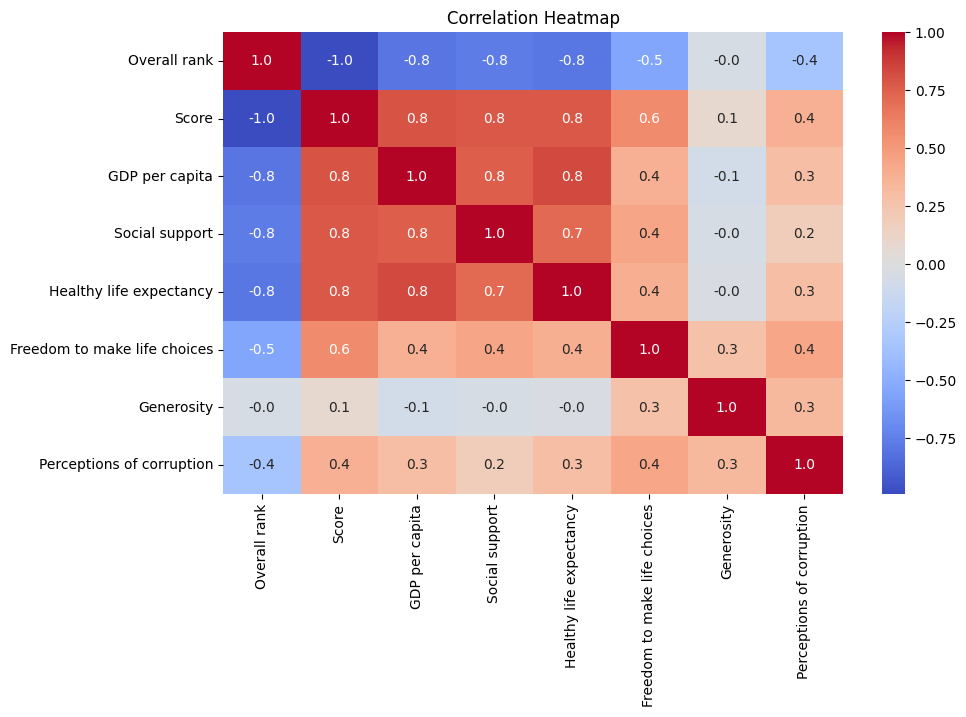

In [10]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()


# 2- Data Processing

In [11]:
#Check data types before Processing
data.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

## Normalization

```
# Normalization is the process of scaling numerical features to have a mean of 0 and a standard deviation of 1.
# This process is done to ensure that the features contribute equally to the analysis.
```

In [12]:
#Normalization of Float Value Columns
scaler = StandardScaler()
cols_to_normalize = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
scaled_data = scaler.fit(data[cols_to_normalize])
data[cols_to_normalize] = scaler.transform(data[cols_to_normalize])


In [13]:
#Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
data[cols_to_normalize] = min_max_scaler.fit_transform(data[cols_to_normalize])

In [14]:
data.describe() #after normalization

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,0.519548,0.537498,0.744344,0.635621,0.622140,0.326583,0.244156
std,45.177428,0.226428,0.236573,0.184231,0.212203,0.227083,0.168294,0.208693
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,0.344081,0.357928,0.650092,0.480061,0.488114,0.192138,0.103753
50%,78.500000,0.513934,0.570071,0.782943,0.691499,0.660856,0.313604,0.188742
75%,117.250000,0.677685,0.731888,0.894397,0.772787,0.803883,0.438604,0.311810
max,156.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


## Save the cleaned dataset


In [16]:
# Save the cleaned dataset to the new CSV file.
data.to_csv('cleaned_2019WorldHappiness.csv', index=False)

# 3- Data Visualization

In [17]:
url = 'https://filebin.net/szfckgjh9c34r2fx/cleaned_2019WorldHappiness.csv'
df = pd.read_csv(url)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


## Boxplot

In [18]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [19]:
#rename columns
df.rename(columns={'Country or region':'Country', 'Score': 'Happiness Score'}, inplace=True)
df.head()# check

,Overall rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


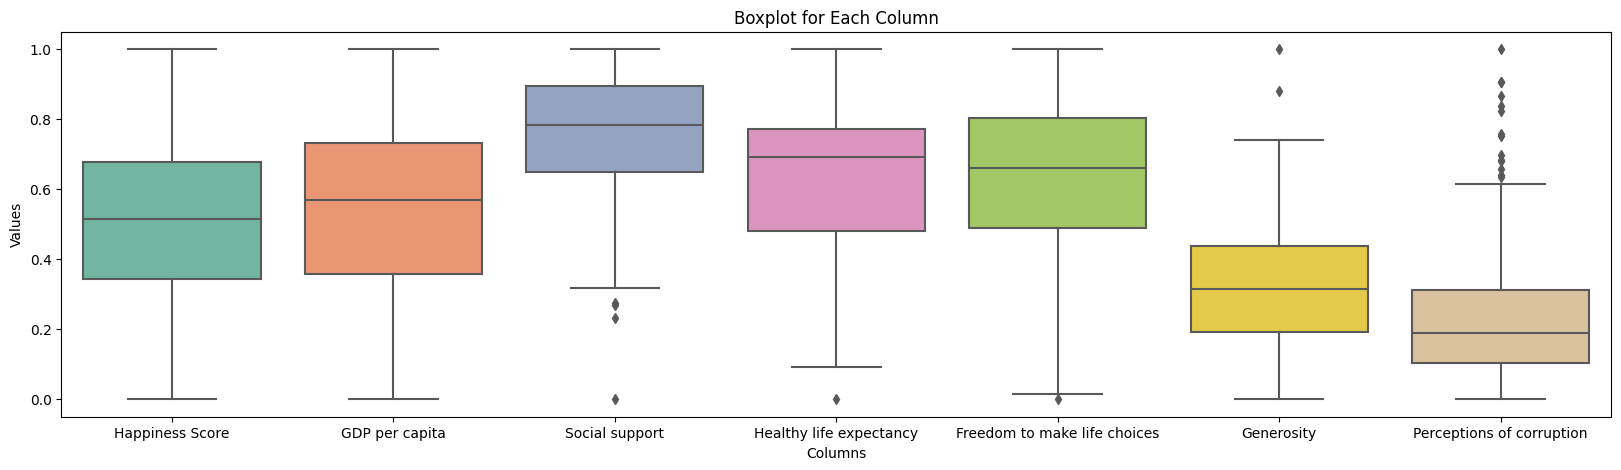

In [20]:
#Set the matplotlib
plt.figure(figsize=(20, 5))

# Create a new DataFrame (df_bx) with the same data as the original DataFrame (df)
df_bx = df.copy()

#Create boxplots for each column using seaborn
sns.boxplot(data=df_bx.drop('Overall rank', axis=1), orient='v', palette='Set2')
#Labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')
plt.show()

## Scatterplot

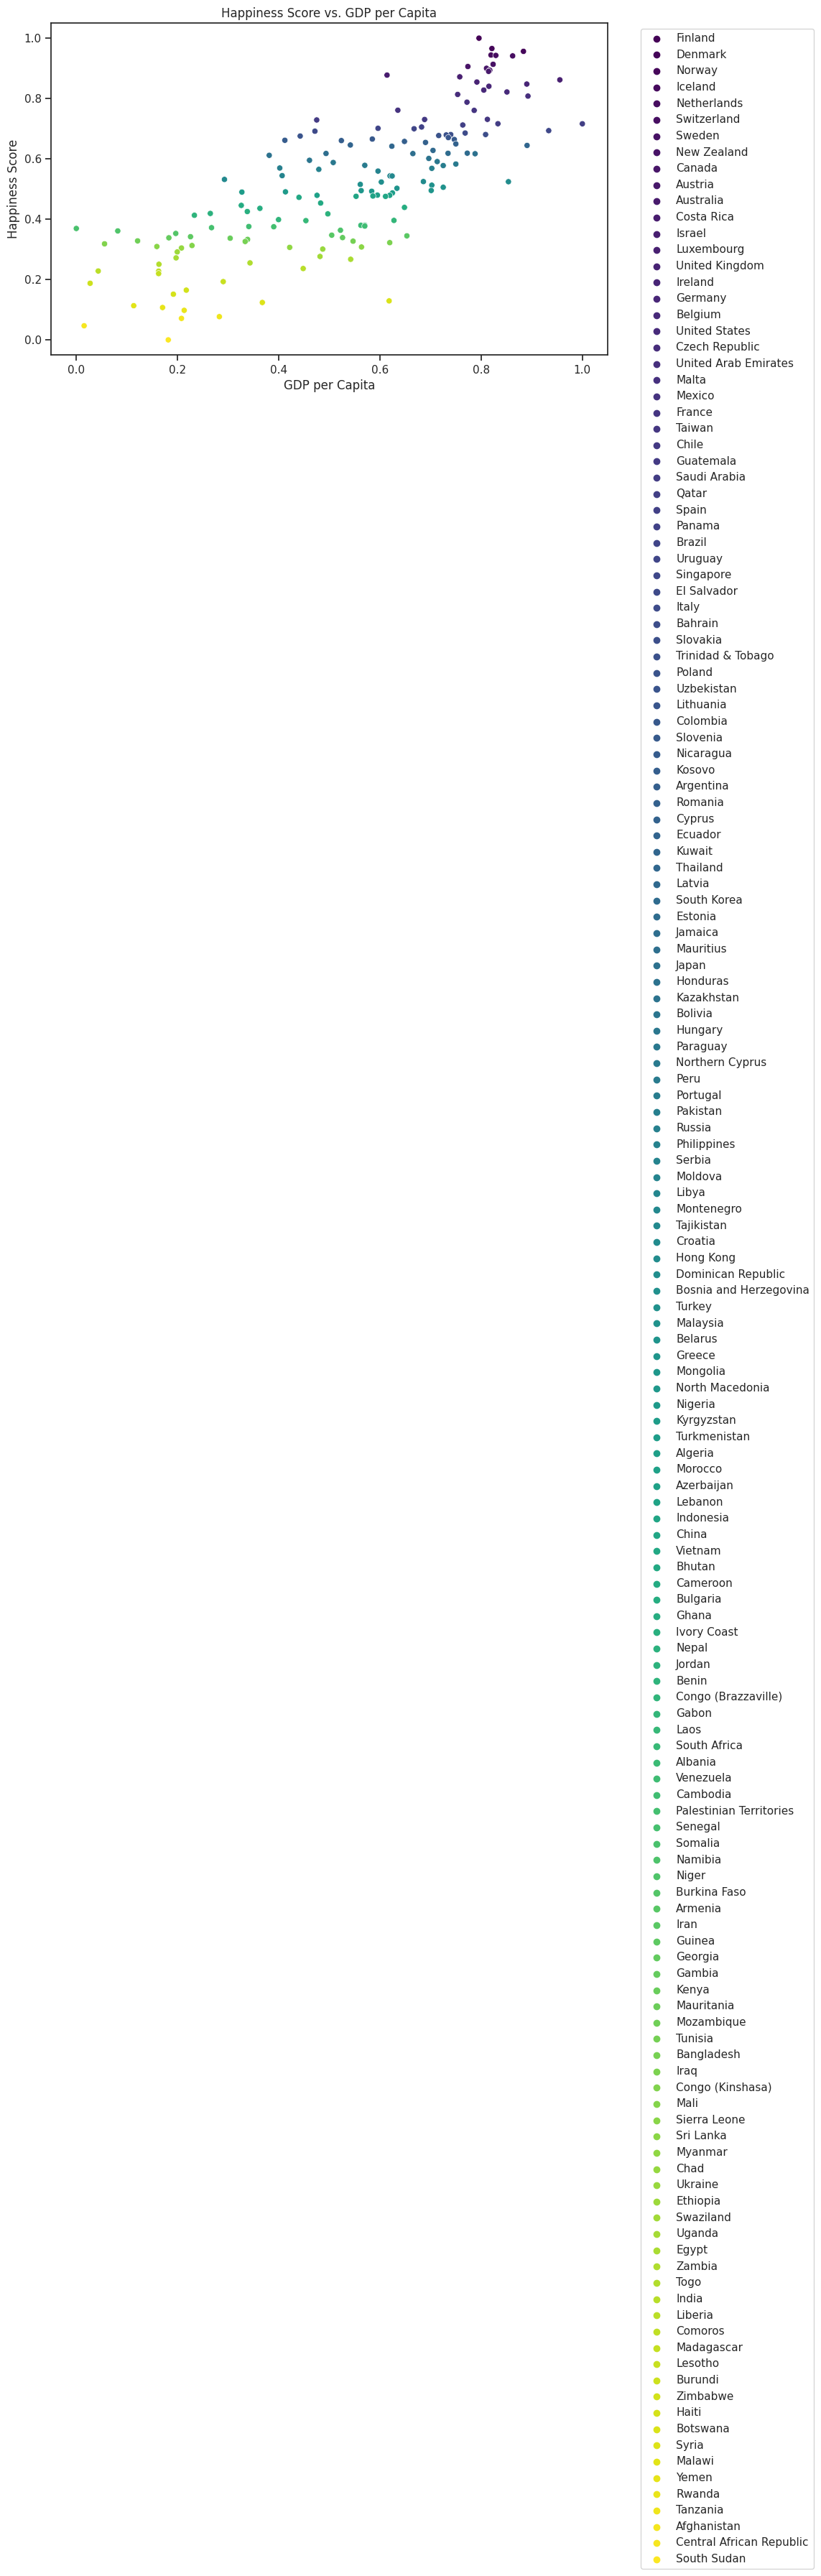

In [21]:
# Create a scatter plot
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='GDP per capita', y='Happiness Score', data=df, hue='Country', palette='viridis')
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')

# Adjust the legend position and size
scatter_plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Top 5 Happiest Countries

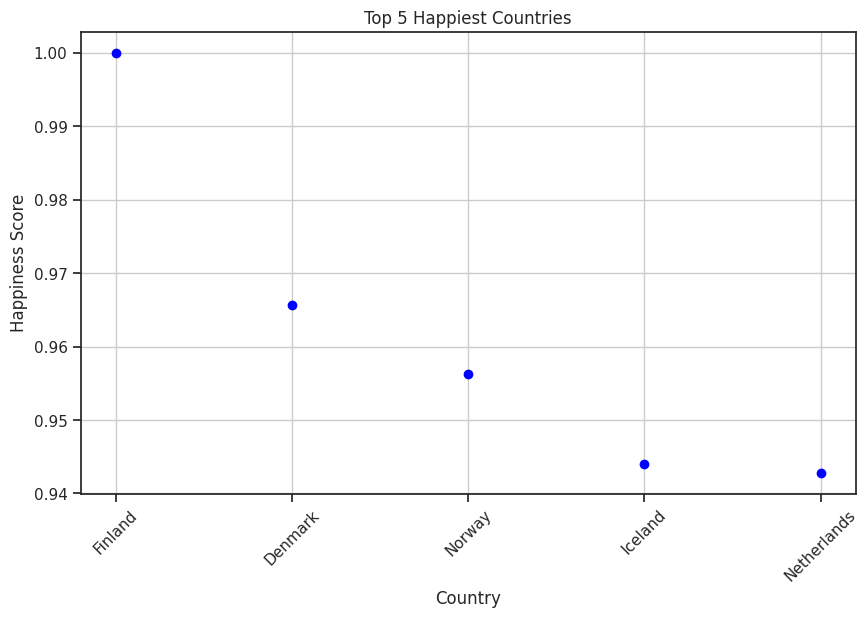

In [22]:
# Create a new DataFrame (df_t5) with the same data as the original DataFrame (df)
df_t5 = df.copy()
df_t5 = df_t5[['Country', 'Happiness Score']]

# Sort the DataFrame by 'Happiness Score' in descending order
df_t5 = df_t5.sort_values(by='Happiness Score', ascending=False)

# Select the top 5 countries
top_5_countries = df_t5.head(5)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(top_5_countries['Country'], top_5_countries['Happiness Score'], color='blue', marker='o')
plt.title('Top 5 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
df.columns

Index(['Overall rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

## Histogram

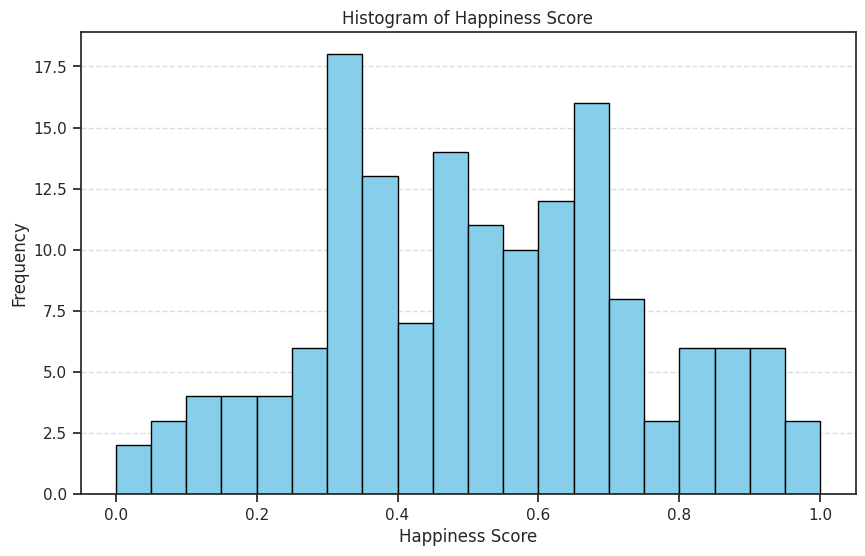

In [24]:
# Select the column to create a histogram
column_to_plot = 'Happiness Score'

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[column_to_plot], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Interactive plot using Plotly

In [25]:
import plotly.express as px
# Interactive plot using Plotly
fig = px.scatter(df, x='GDP per capita', y='Healthy life expectancy', size='Happiness Score', color='Country',
                 hover_name='Country', log_x=True, size_max=60)
fig.update_layout(title='Interactive Scatter Plot: GDP, Life Expectancy, Happiness Score',
                  xaxis_title='GDP (million USD, log scale)',
                  yaxis_title='Life Expectancy',
                  coloraxis_colorbar_title='Country')
fig.show()

## Pairplot for Multiple Comparisons

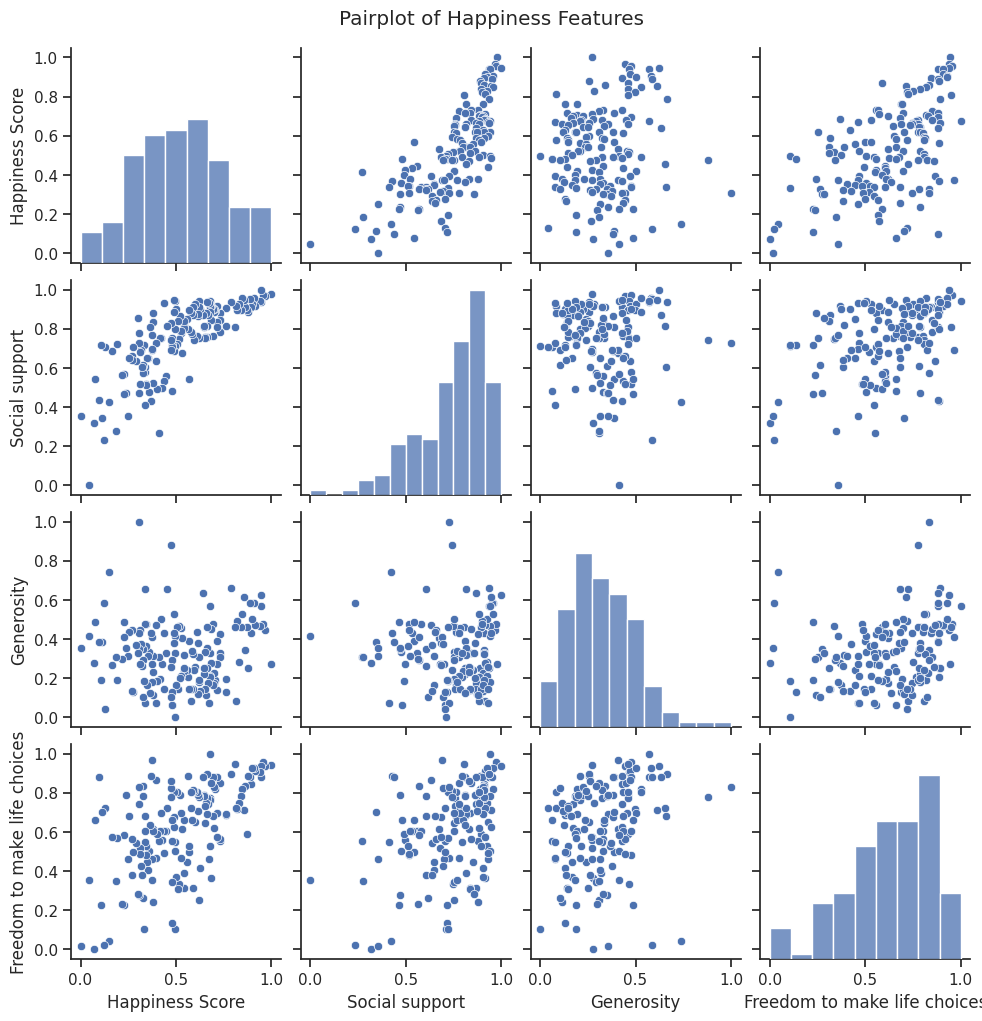

In [26]:
# Create a pairplot for selected features
features = ['Happiness Score', 'Social support', 'Generosity', 'Freedom to make life choices']
sns.pairplot(df[features])
plt.suptitle('Pairplot of Happiness Features', y=1.02)
plt.show()

## Geographic representation of Happiness Score

In [35]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type='choropleth',
            locations = df["Country"],
            locationmode = 'country names',
            z = df["Happiness_Score"],
            text = df["Country"],
            colorbar = {"title":"Happiness Score"})

layout = dict(title = "Geographical Visualization of Happiness Score",
              geo = dict(showframe = True, projection = {"type" : "azimuthal equal area"}))

happiness_map = go.Figure(data = [data], layout=layout)
iplot(happiness_map)

# 4- ML Model

## **Problem Statement:** Given above data build a machine learning model that can predict happiness score based on  other features

In [27]:
df.head()

,Overall rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


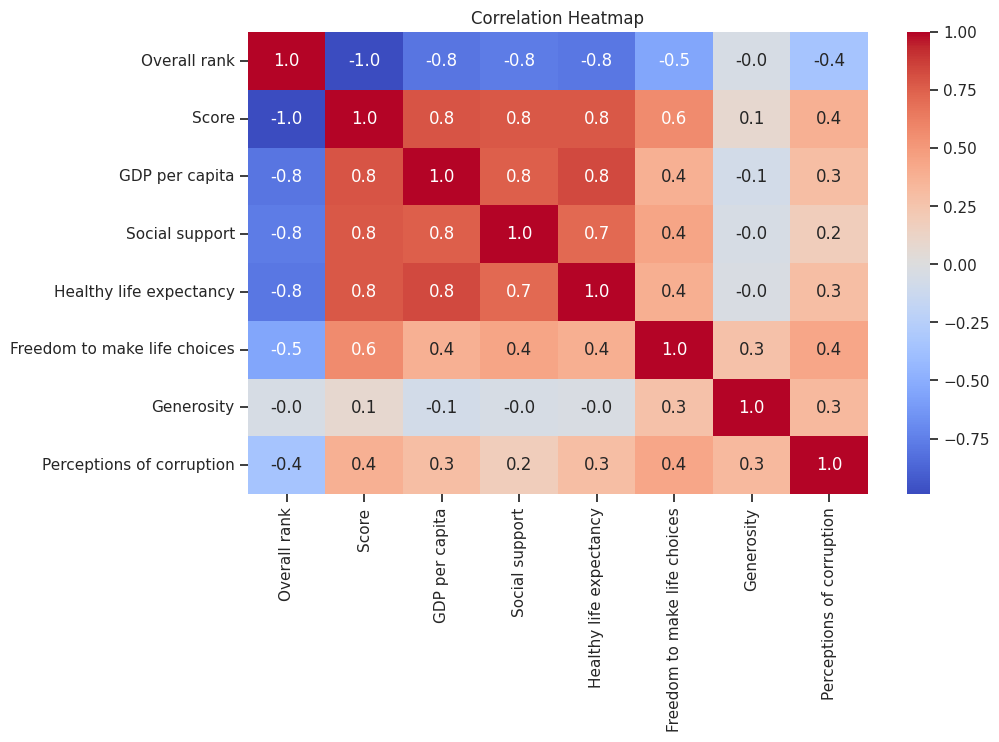

In [28]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Rename columns in DataFrames
df.columns = ['Happiness_Rank', 'Country', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']
df


,Happiness_Rank,Country,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Generosity,Corruption_perception
0,1,Finland,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,2,Denmark,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,3,Norway,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,4,Iceland,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,5,Netherlands,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,0.097844,0.213183,0.437808,0.538124,0.879556,0.383392,0.907285
152,153,Tanzania,0.076892,0.282660,0.544951,0.437336,0.660856,0.487633,0.324503
153,154,Afghanistan,0.071196,0.207838,0.318350,0.316389,0.000000,0.279152,0.055188
154,155,Central African Republic,0.046786,0.015439,0.000000,0.092025,0.356577,0.415194,0.077263


In [30]:
# The target variable ('Happiness Score')
# Relevant features based on higher absolute correlation:
# => GDP per capita, Family, Health

In [36]:
df.drop(['Country' , 'Happiness_Rank'] , axis = 1 , inplace = True)

In [37]:
df.dtypes

Happiness_Score          float64
GDP_per_capita           float64
Family                   float64
Health                   float64
Freedom                  float64
Generosity               float64
Corruption_perception    float64
dtype: object

In [43]:
y = df['Happiness_Score'] # target
X = ['GDP_per_capita', 'Family', 'Health']  # feature
df[X]

,GDP_per_capita,Family,Health
0,0.795724,0.977217,0.864154
1,0.821259,0.968596,0.872918
2,0.883610,0.974138,0.900964
3,0.819477,1.000000,0.899211
4,0.828979,0.937192,0.875548
...,...,...,...
151,0.213183,0.437808,0.538124
152,0.282660,0.544951,0.437336
153,0.207838,0.318350,0.316389
154,0.015439,0.000000,0.092025


## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df[X] , y , test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.11065351154308181
Mean Squared Error: 0.01918676802336656
R-squared: 0.5544563440984411


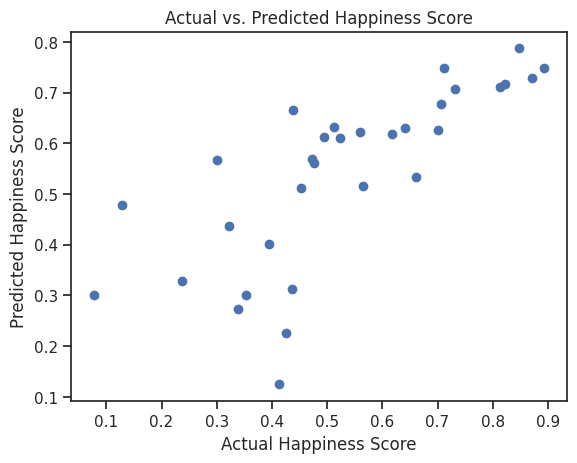

Linear Regression R^2 : 0.5544563440984411


In [46]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score')
plt.show()
lr.fit(X_train , y_train)
print(f"Linear Regression R^2 : {lr.score(X_test , y_test)}")

## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Make predictions on the test set
predictions = RF.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.09940023647274207
Mean Squared Error: 0.016244885714332566
R-squared: 0.6227709762242295


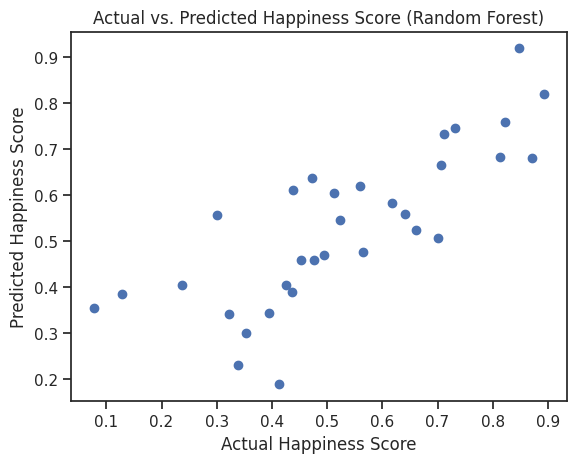

In [49]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score (Random Forest)')
plt.show()

## Support Vector Regressor (SVR)

In [51]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor model
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the scaled test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Absolute Error: 0.1100379134399816
Mean Squared Error: 0.01875366541154886
R-squared: 0.564513594012276


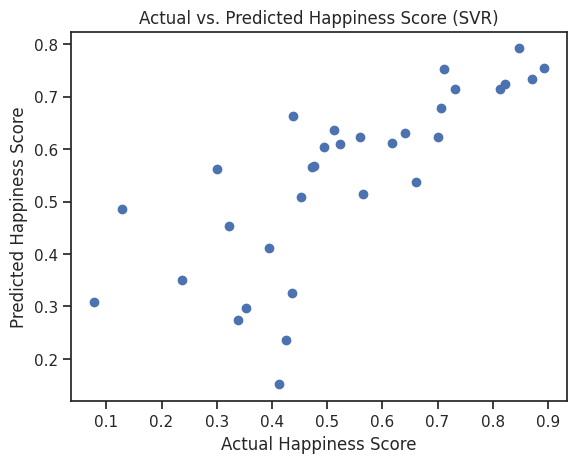

In [52]:
# Plot the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Score (SVR)')
plt.show()

In [55]:
# Getting the model score
lr.score(X_test, y_test)

0.5544563440984411

In [56]:
RF.score(X_test, y_test)

0.6227709762242295

In [57]:
model.score(X_test, y_test)

0.564513594012276